In [1]:
import cartopy.crs as ccrs
import matplotlib.animation as animation
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt



In [1]:
import geocat.datafiles as gdf
import geocat.viz as gv

In [31]:
File="/home/snigdha/Documents/LAKEBYLAKE/direction_field_wrong_fixable_nowfixed_deleteme_after_checking/"
Filename="2017_12_01_11_lat9p845S.M2_all2Dfields.nc"
ddd = xr.open_dataset(File +Filename)
ddd


<xarray.Dataset>
Dimensions:            (lat: 45, lon: 73, time: 264)
Coordinates:
  * time               (time) datetime64[ns] 2017-11-20T11:29:59.999997 ... 2...
  * lat                (lat) float64 -19.5 -19.0 -18.5 -18.0 ... 1.0 1.5 2.0 2.5
  * lon                (lon) float64 39.38 40.0 40.62 ... 83.12 83.75 84.38
Data variables: (12/26)
    dqvdt_phy          (time, lat, lon) float32 ...
    dqvdt_dyn          (time, lat, lon) float32 ...
    dqvdt_ana          (time, lat, lon) float32 ...
    uflxqv             (time, lat, lon) float32 ...
    vflxqv             (time, lat, lon) float32 ...
    swnettoa           (time, lat, lon) float32 ...
    ...                 ...
    slp                (time, lat, lon) float32 ...
    tqv                (time, lat, lon) float32 ...
    tqi                (time, lat, lon) float32 ...
    tql                (time, lat, lon) float32 ...
    distance           (time, lat, lon) float32 ...
    dir_from_centroid  (time, lat, lon) float32 ...
Attributes:
    title:        MERRA-2 tavg1_2d_int_Nx: 2d,1-Hourly,Time-Averaged,Single-L...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Mon Jan 30 17:21:04 GMT 2023 : imported by GrADS Data Serve...

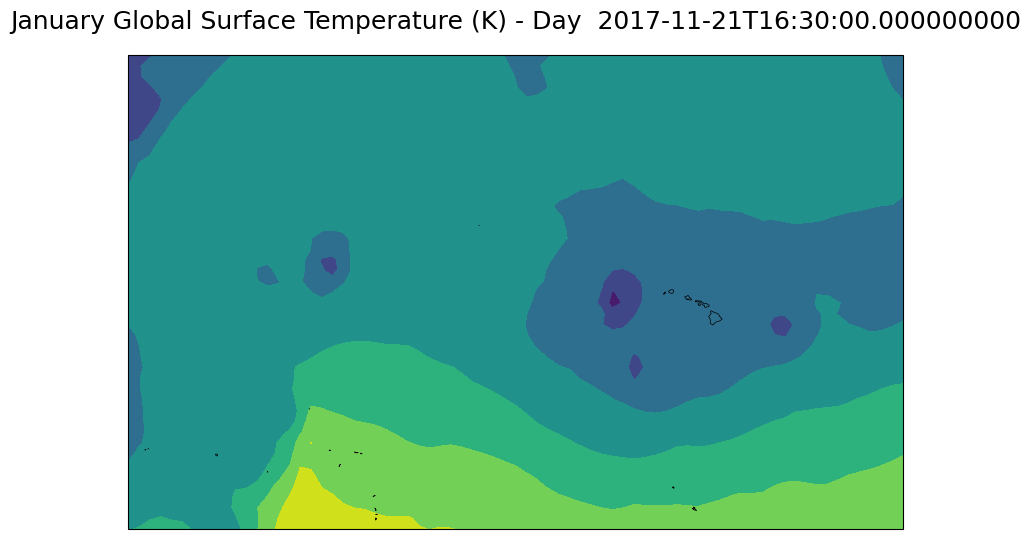

In [49]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.coastlines(linewidths=0.5)
#ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=10)

# Use geocat.viz.util convenience function to make latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)

ax.contourf(ddd.slp[0,:,:])

# animate function for matplotlib FuncAnimation
def animate(i):
    ax.contourf(ddd.slp[i,:,:])

    gv.set_titles_and_labels(
        ax,
        maintitle="January Global Surface Temperature (K) - Day  " +
        str(ddd.slp.time.values[i]),
        xlabel="",
        ylabel="")


# runs the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=30, interval=200)

# Uncomment this line to save the created animation
anim.save('animate_1.gif', writer='pillow', fps=5)
plt.show()


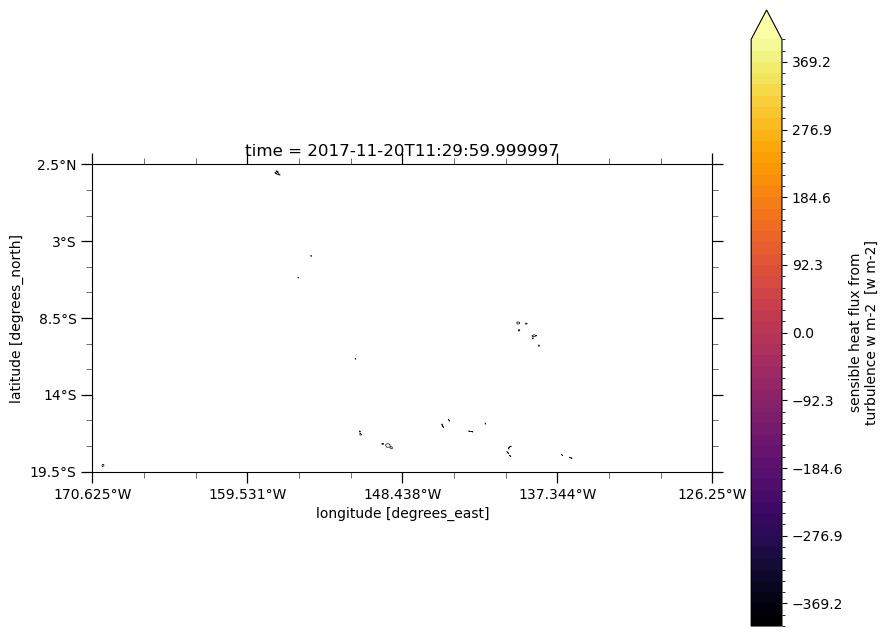

In [29]:
fig = plt.figure(figsize=(10, 8))
# Generate axes using Cartopy and draw coastlines
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.coastlines(linewidths=0.5)
ax.set_extent([39.375, 83.75, -19.5, 2.5], ccrs.PlateCarree())

# Use geocat.viz.util convenience function to set axes limits & tick values
gv.set_axes_limits_and_ticks(ax,
                             xlim=(39.375, 83.75),
                             ylim=(-19.5, 2.5),
                             xticks=np.linspace(39.375, 83.75, 5),
                             yticks=np.linspace(-19.5, 2.5, 5))


# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=10)

# Use geocat.viz.util convenience function to make latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)

# create initial plot that establishes a colorbar
ddd.hflux[0, :, :].plot.contourf(ax=ax,
                           transform=ccrs.PlateCarree(),
                           vmin=-400,
                           vmax=400,
                           levels=53,
                           cmap="inferno",
                           )

In [ ]:
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())







# animate function for matplotlib FuncAnimation
def animate(i):
    tas[i, :, :].plot.contourf(
        ax=ax,
        transform=ccrs.PlateCarree(),
        vmin=195,
        vmax=328,
        levels=53,
        cmap="inferno",
        add_colorbar=False,
    )

    gv.set_titles_and_labels(
        ax,
        maintitle="January Global Surface Temperature (K) - Day  " +
        str(tas.coords['time'].values[i])[:13],
        xlabel="",
        ylabel="")


# runs the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=30, interval=200)

# Uncomment this line to save the created animation
anim.save('animate_1.gif', writer='pillow', fps=5)

In [46]:
str(ddd.slp.time.values[0])

'2017-11-20T11:29:59.999997000'

In [2]:
filestart='/home/snigdha/Documents/'
folder=['AMSR2' , 'data-selected' , 'era5_cwv_that_2014',  'GFD2',  'LAKEBYLAKE']
filename='/era5_cwv_that_2014_01_01.nc'
firstfile = xr.open_dataset(filestart + folder[2] + filename )
firstfile


<xarray.Dataset>
Dimensions:  (lat: 280, lon: 1440, time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 ... 2014-01-01T21:00:00
  * lat      (lat) float32 -34.88 -34.62 -34.38 -34.12 ... 34.38 34.62 34.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    T_ft     (time, lat, lon) float32 ...
    T_bl     (time, lat, lon) float32 ...
    T_lft    (time, lat, lon) float32 ...
    cwv      (time, lat, lon) float32 ...
    cwv_sat  (time, lat, lon) float32 ...
    wv_lft   (time, lat, lon) float32 ...
    wv_bl    (time, lat, lon) float32 ...

In [5]:
filestart + folder[2] + filename 


'/home/snigdha/Documents/era5_cwv_that_2014/era5_cwv_that_2014_01_01.nc'

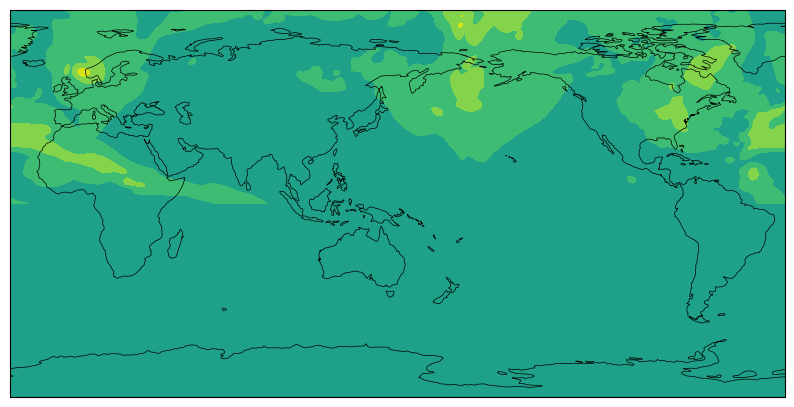

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.coastlines(linewidths=0.5)
#ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
# Use geocat.viz.util convenience function to add minor and major tick lines
#gv.add_major_minor_ticks(ax, labelsize=10)

# Use geocat.viz.util convenience function to make latitude, longitude tick labels
#gv.add_lat_lon_ticklabels(ax)

ax.contourf(firstfile.cwv[0,:,:])

# animate function for matplotlib FuncAnimation
def animate(i):
    ax.contourf(firstfile.cwv[i,:,:])



# runs the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=8, interval=500)

# Uncomment this line to save the created animation
anim.save('animate_1.gif', writer='pillow', fps=5)
plt.show()


In [14]:
f2='/home/snigdha/Documents/AMSR2/2014/RSS_AMSR2_ocean_L3_daily_2014-06-24_v08.2.nc'

file2 = xr.open_dataset(f2)
file2


<xarray.Dataset>
Dimensions:             (lat: 720, lon: 1440, pass: 2)
Coordinates:
  * lon                 (lon) float32 0.125 0.375 0.625 ... 359.4 359.6 359.9
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * pass                (pass) int32 1 2
Data variables:
    time                (pass, lat, lon) datetime64[ns] ...
    SST                 (pass, lat, lon) float32 ...
    wind_speed_LF       (pass, lat, lon) float32 ...
    wind_speed_MF       (pass, lat, lon) float32 ...
    wind_speed_AW       (pass, lat, lon) float32 ...
    water_vapor         (pass, lat, lon) float32 ...
    cloud_liquid_water  (pass, lat, lon) float32 ...
    rain_rate           (pass, lat, lon) float32 ...
    land_mask           (pass, lat, lon) int8 ...
    sea_ice_mask        (pass, lat, lon) int8 ...
    coast_mask          (pass, lat, lon) int8 ...
    noobs_mask          (pass, lat, lon) int8 ...
Attributes: (12/51)
    Conventions:                            CF-1.6
    title:                                  RSS AMSR2 V8.2 Air-Sea Essential ...
    summary:                                RSS climate quality air-sea produ...
    version:                                8.2
    processing_level:                       Level 3: 0.25 deg daily maps
    history:                                created by RSS
    ...                                     ...
    geospatial_lon_units:                   degrees_east
    references:                             Source_of_AMSR2_radiometer_observ...
    averaging_procedure:                    each grid cell contains valid obs...
    approx_local_equatorial_crossing_time:  node_dimension 1 = 13:30h,  node_...
    pass:                                   node_dimension 1 = ascending,  no...
    acknowledgement:                        AMSR2 AS-ECVs are produced by Rem...

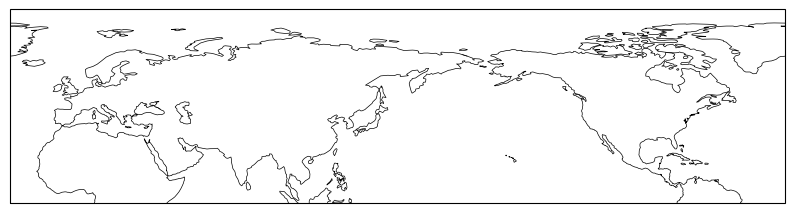

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.coastlines(linewidths=0.5)

ax.contourf(file2.water_vapor[0,:,:])
plt.show()

In [12]:
file2.water_vapor

<xarray.DataArray 'water_vapor' (pass: 2, lat: 720, lon: 1440)>
[2073600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * pass     (pass) int32 1 2
Attributes:
    long_name:              AMSR2 columnar water vapor
    standard_name:          atmosphere_mass_content_of_water_vapor
    units:                  kg m-2
    valid_min:              0.0
    valid_max:              120.0
    resolution:             spatial resolution of retrieval is approx. 18km
    coverage_content_type:  physicalMeasurement

In [17]:


f3='/home/snigdha/Documents/LAKEBYLAKE/IMERG/2014_04_17_06_lat6p223S_IMERG_precipc_3hourly.nc'

file3 = xr.open_dataset(f3)
file3


<xarray.Dataset>
Dimensions:  (lat: 294, lon: 556, time: 79)
Coordinates:
  * time     (time) datetime64[ns] 2014-04-07T12:00:00 ... 2014-04-17T06:00:00
  * lat      (lat) float64 -24.35 -24.25 -24.15 -24.05 ... 4.65 4.75 4.85 4.95
  * lon      (lon) float64 32.35 32.45 32.55 32.65 ... 87.55 87.65 87.75 87.85
Data variables:
    precipc  (time, lat, lon) float32 ...

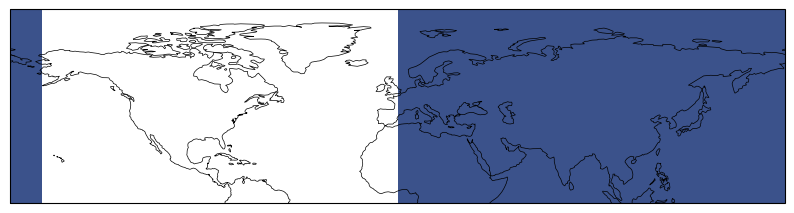

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines(linewidths=0.5)


ax.contourf(file3.precipc[0,:,:])

# animate function for matplotlib FuncAnimation
def animate(i):
    ax.contourf(file3.precipc[i,:,:])



# runs the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=79, interval=500)

# Uncomment this line to save the created animation
anim.save('animate_1.gif', writer='pillow', fps=5)
plt.show()


In [27]:
print(file3.precipc[0,0,:])


<xarray.DataArray 'precipc' (lon: 556)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
    time     datetime64[ns] 2014-04-07T12:00:00
    lat      float64 -24.35
  * lon      (lon) float64 32.35 32.45 32.55 32.65 ... 87.55 87.65 87.75 87.85
Attributes:
    long_name:  precipitationcal [mm/hr] 


In [28]:
f4='/home/snigdha/Documents/LAKEBYLAKE/MERRA2_2D/2014_01_28_05_lat11p47S.M2_all2Dfields.nc'
file4 = xr.open_dataset(f4)
file4

<xarray.Dataset>
Dimensions:            (lat: 101, lon: 111, time: 653)
Coordinates:
  * time               (time) datetime64[ns] 2014-01-01T00:30:00.000003 ... 2...
  * lat                (lat) float64 -35.0 -34.5 -34.0 -33.5 ... 14.0 14.5 15.0
  * lon                (lon) float64 25.0 25.62 26.25 26.88 ... 92.5 93.12 93.75
Data variables: (12/26)
    dqvdt_phy          (time, lat, lon) float32 ...
    dqvdt_dyn          (time, lat, lon) float32 ...
    dqvdt_ana          (time, lat, lon) float32 ...
    uflxqv             (time, lat, lon) float32 ...
    vflxqv             (time, lat, lon) float32 ...
    swnettoa           (time, lat, lon) float32 ...
    ...                 ...
    slp                (time, lat, lon) float32 ...
    tqv                (time, lat, lon) float32 ...
    tqi                (time, lat, lon) float32 ...
    tql                (time, lat, lon) float32 ...
    distance           (time, lat, lon) float32 ...
    dir_from_centroid  (time, lat, lon) float32 ...
Attributes:
    title:        MERRA-2 tavg1_2d_int_Nx: 2d,1-Hourly,Time-Averaged,Single-L...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Wed Feb 08 18:51:53 GMT 2023 : imported by GrADS Data Serve...

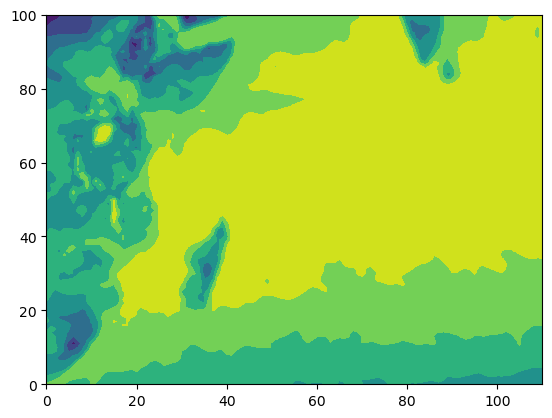

In [29]:
plt.contourf(file4.ts[0,:,:])
plt.show()

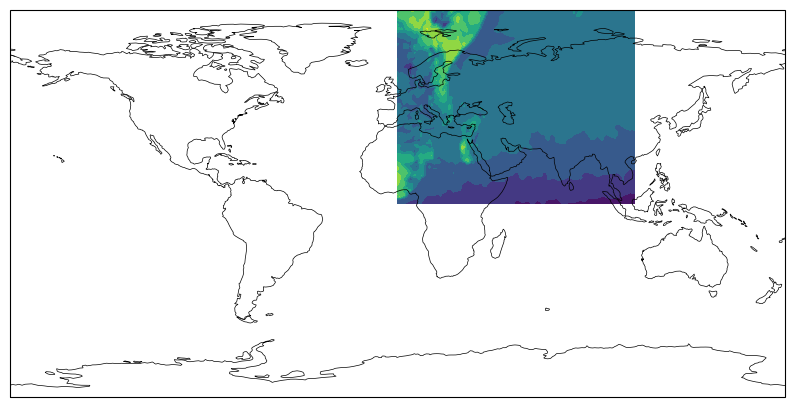

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidths=0.5)
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

ax.contourf(file4.ts[0,:,:])

# animate function for matplotlib FuncAnimation
def animate(i):
    ax.contourf(file4.ts[i,:,:])



# runs the animation initiated with the frame from init and progressed with the animate function
anim = animation.FuncAnimation(fig, animate, frames=10, interval=500)

# Uncomment this line to save the created animation
anim.save('animate_2.gif', writer='pillow', fps=5)
plt.show()


In [2]:
f4='/home/snigdha/Documents/LAKEBYLAKE/MERRA2_2D/2014_01_28_05_lat11p47S.M2_all2Dfields.nc'

f5= '/home/snigdha/Documents/LAKEBYLAKE/2017_05_28_11_lat5p291S.M2_composite.nc'
file5 = xr.open_dataset(f5)
file5

<xarray.Dataset>
Dimensions:      (distance: 234199)
Coordinates:
  * distance     (distance) float64 -2.874 -2.866 -2.857 ... 38.39 38.48 38.65
Data variables: (12/24)
    dqvdt_phy    (distance) float32 ...
    dqvdt_dyn    (distance) float32 ...
    dqvdt_ana    (distance) float32 ...
    uflxqv       (distance) float32 ...
    vflxqv       (distance) float32 ...
    swnettoa     (distance) float32 ...
    ...           ...
    q850         (distance) float32 ...
    q500         (distance) float32 ...
    slp          (distance) float32 ...
    tqv          (distance) float32 ...
    tqi          (distance) float32 ...
    tql          (distance) float32 ...

In [ ]:
https://zombie-einstein.github.io/2020/06/27/probabilistic_ca.html